In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (50,40)

In [3]:
x= pd.read_csv('dengue_features_train.csv')
y= pd.read_csv('dengue_labels_train.csv')

In [4]:
x.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      30-04-1990  0.122600  0.103725  0.198483   
1   sj  1990          19      07-05-1990  0.169900  0.142175  0.162357   
2   sj  1990          20      14-05-1990  0.032250  0.172967  0.157200   
3   sj  1990          21      21-05-1990  0.128633  0.245067  0.227557   
4   sj  1990          22      28-05-1990  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [5]:
y.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [6]:
x_y= pd.concat([x,y['total_cases']],axis=1)

In [7]:
x_y.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      30-04-1990  0.122600  0.103725  0.198483   
1   sj  1990          19      07-05-1990  0.169900  0.142175  0.162357   
2   sj  1990          20      14-05-1990  0.032250  0.172967  0.157200   
3   sj  1990          21      21-05-1990  0.128633  0.245067  0.227557   
4   sj  1990          22      28-05-1990  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 25 columns]

In [8]:
x_y.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [9]:
x_y.isnull

<bound method DataFrame.isnull of      city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      30-04-1990  0.122600  0.103725  0.198483   
1      sj  1990          19      07-05-1990  0.169900  0.142175  0.162357   
2      sj  1990          20      14-05-1990  0.032250  0.172967  0.157200   
3      sj  1990          21      21-05-1990  0.128633  0.245067  0.227557   
4      sj  1990          22      28-05-1990  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      28-05-2010  0.342750  0.318900  0.256343   
1452   iq  2010          22      04-06-2010  0.160157  0.160371  0.136043   
1453   iq  2010          23      11-06-2010  0.247057  0.146057  0.250357   
1454   iq  2010          24      18-06-2010  0.333914  0.245771  0.278886   
1455   iq  2010          25      25-06-2010  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  rea

In [10]:
x_int= x_y.loc[:,'year':]
x_int.head()

year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  1990          18      30-04-1990  0.122600  0.103725  0.198483  0.177617   
1  1990          19      07-05-1990  0.169900  0.142175  0.162357  0.155486   
2  1990          20      14-05-1990  0.032250  0.172967  0.157200  0.170843   
3  1990          21      21-05-1990  0.128633  0.245067  0.227557  0.235886   
4  1990          22      28-05-1990  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  ...  \
0                 12.42             297.572857             297.742857  ...   
1                 22.82             298.211429             298.442857  ...   
2                 34.54             298.781429             298.878571  ...   
3                 15.36             298.987143             299.228571  ...   
4                  7.52             299.518571             299.664286  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 24 columns]

In [11]:
x_int.isnull().sum()

year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

In [12]:
x_int= x_int.drop(['week_start_date'],axis=1)
x_int.head()

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  1990          18  0.122600  0.103725  0.198483  0.177617   
1  1990          19  0.169900  0.142175  0.162357  0.155486   
2  1990          20  0.032250  0.172967  0.157200  0.170843   
3  1990          21  0.128633  0.245067  0.227557  0.235886   
4  1990          22  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 12.42             297.572857             297.742857   
1                 22.82             298.211429             298.442857   
2                 34.54             298.781429             298.878571   
3                 15.36             298.987143             299.228571   
4                  7.52             299.518571             299.664286   

   reanalysis_dew_point_temp_k  ...  reanalysis_relative_humidity_percent  \
0                   292.414286  ...                             73.365714   
1                   293.951429  ...                             77.368571   
2                   295.434286  ...                             82.052857   
3                   295.310000  ...                             80.337143   
4                   295.821429  ...                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  
3                33.3                23.3                4.0            3  
4                35.0                23.9                5.8            6  

[5 rows x 23 columns]

In [13]:
x_int= x_int.fillna( x_int.median())

In [14]:
x_int.isnull().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
dtype: int6

In [15]:
x_int.describe().transpose()

count         mean        std  \
year                                   1456.0  2001.031593   5.408314   
weekofyear                             1456.0    26.503434  15.019437   
ndvi_ne                                1456.0     0.140498   0.130908   
ndvi_nw                                1456.0     0.130227   0.117847   
ndvi_se                                1456.0     0.203666   0.073305   
ndvi_sw                                1456.0     0.202111   0.083281   
precipitation_amt_mm                   1456.0    45.694135  43.525407   
reanalysis_air_temp_k                  1456.0   298.701472   1.357737   
reanalysis_avg_temp_k                  1456.0   299.226016   1.257383   
reanalysis_dew_point_temp_k            1456.0   295.249065   1.522899   
reanalysis_max_air_temp_k              1456.0   303.420055   3.224583   
reanalysis_min_air_temp_k              1456.0   295.722459   2.556842   
reanalysis_precip_amt_kg_per_m2        1456.0    40.063173  43.298015   
reanalysis_relative_humidity_percent   1456.0    82.149181   7.130928   
reanalysis_sat_precip_amt_mm           1456.0    45.694135  43.525407   
reanalysis_specific_humidity_g_per_kg  1456.0    16.748767   1.537442   
reanalysis_tdtr_k                      1456.0     4.889698   3.538279   
station_avg_temp_c                     1456.0    27.192532   1.273696   
station_diur_temp_rng_c                1456.0     8.036903   2.100818   
station_max_temp_c                     1456.0    32.457212   1.946226   
station_min_temp_c                     1456.0    22.103091   1.566504   
station_precip_mm                      1456.0    39.092514  47.133032   
total_cases                            1456.0    24.675137  43.596000   

                                               min          25%          50%  \
year                                   1990.000000  1997.000000  2002.000000   
weekofyear                                1.000000    13.750000    26.500000   
ndvi_ne                                  -0.406250     0.055625     0.128817   
ndvi_nw                                  -0.456100     0.051367     0.121429   
ndvi_se                                  -0.015533     0.155625     0.196050   
ndvi_sw                                  -0.063457     0.144718     0.189450   
precipitation_amt_mm                      0.000000     9.960000    38.340000   
reanalysis_air_temp_k                   294.635714   297.665000   298.646429   
reanalysis_avg_temp_k                   294.892857   298.264286   299.289286   
reanalysis_dew_point_temp_k             289.642857   294.130357   295.640714   
reanalysis_max_air_temp_k               297.800000   301.000000   302.400000   
reanalysis_min_air_temp_k               286.900000   293.900000   296.200000   
reanalysis_precip_amt_kg_per_m2           0.000000    13.200000    27.245000   
reanalysis_relative_humidity_percent     57.787143    77.226429    80.301429   
reanalysis_sat_precip_amt_mm              0.000000     9.960000    38.340000   
reanalysis_specific_humidity_g_per_kg    11.715714    15.561429    17.087143   
reanalysis_tdtr_k                         1.357143     2.328571     2.857143   
station_avg_temp_c                       21.400000    26.328571    27.414286   
station_diur_temp_rng_c                   4.528571     6.528571     7.300000   
station_max_temp_c                       26.700000    31.100000    32.800000   
station_min_temp_c                       14.700000    21.100000    22.200000   
station_precip_mm                         0.000000     8.850000    23.850000   
total_cases                               0.000000     5.000000    12.000000   

                                               75%          max  
year                                   2005.000000  2010.000000  
weekofyear                               39.250000    53.000000  
ndvi_ne                                   0.229292     0.508357  
ndvi_nw                                   0.212325     0.454429  
ndvi_se                             

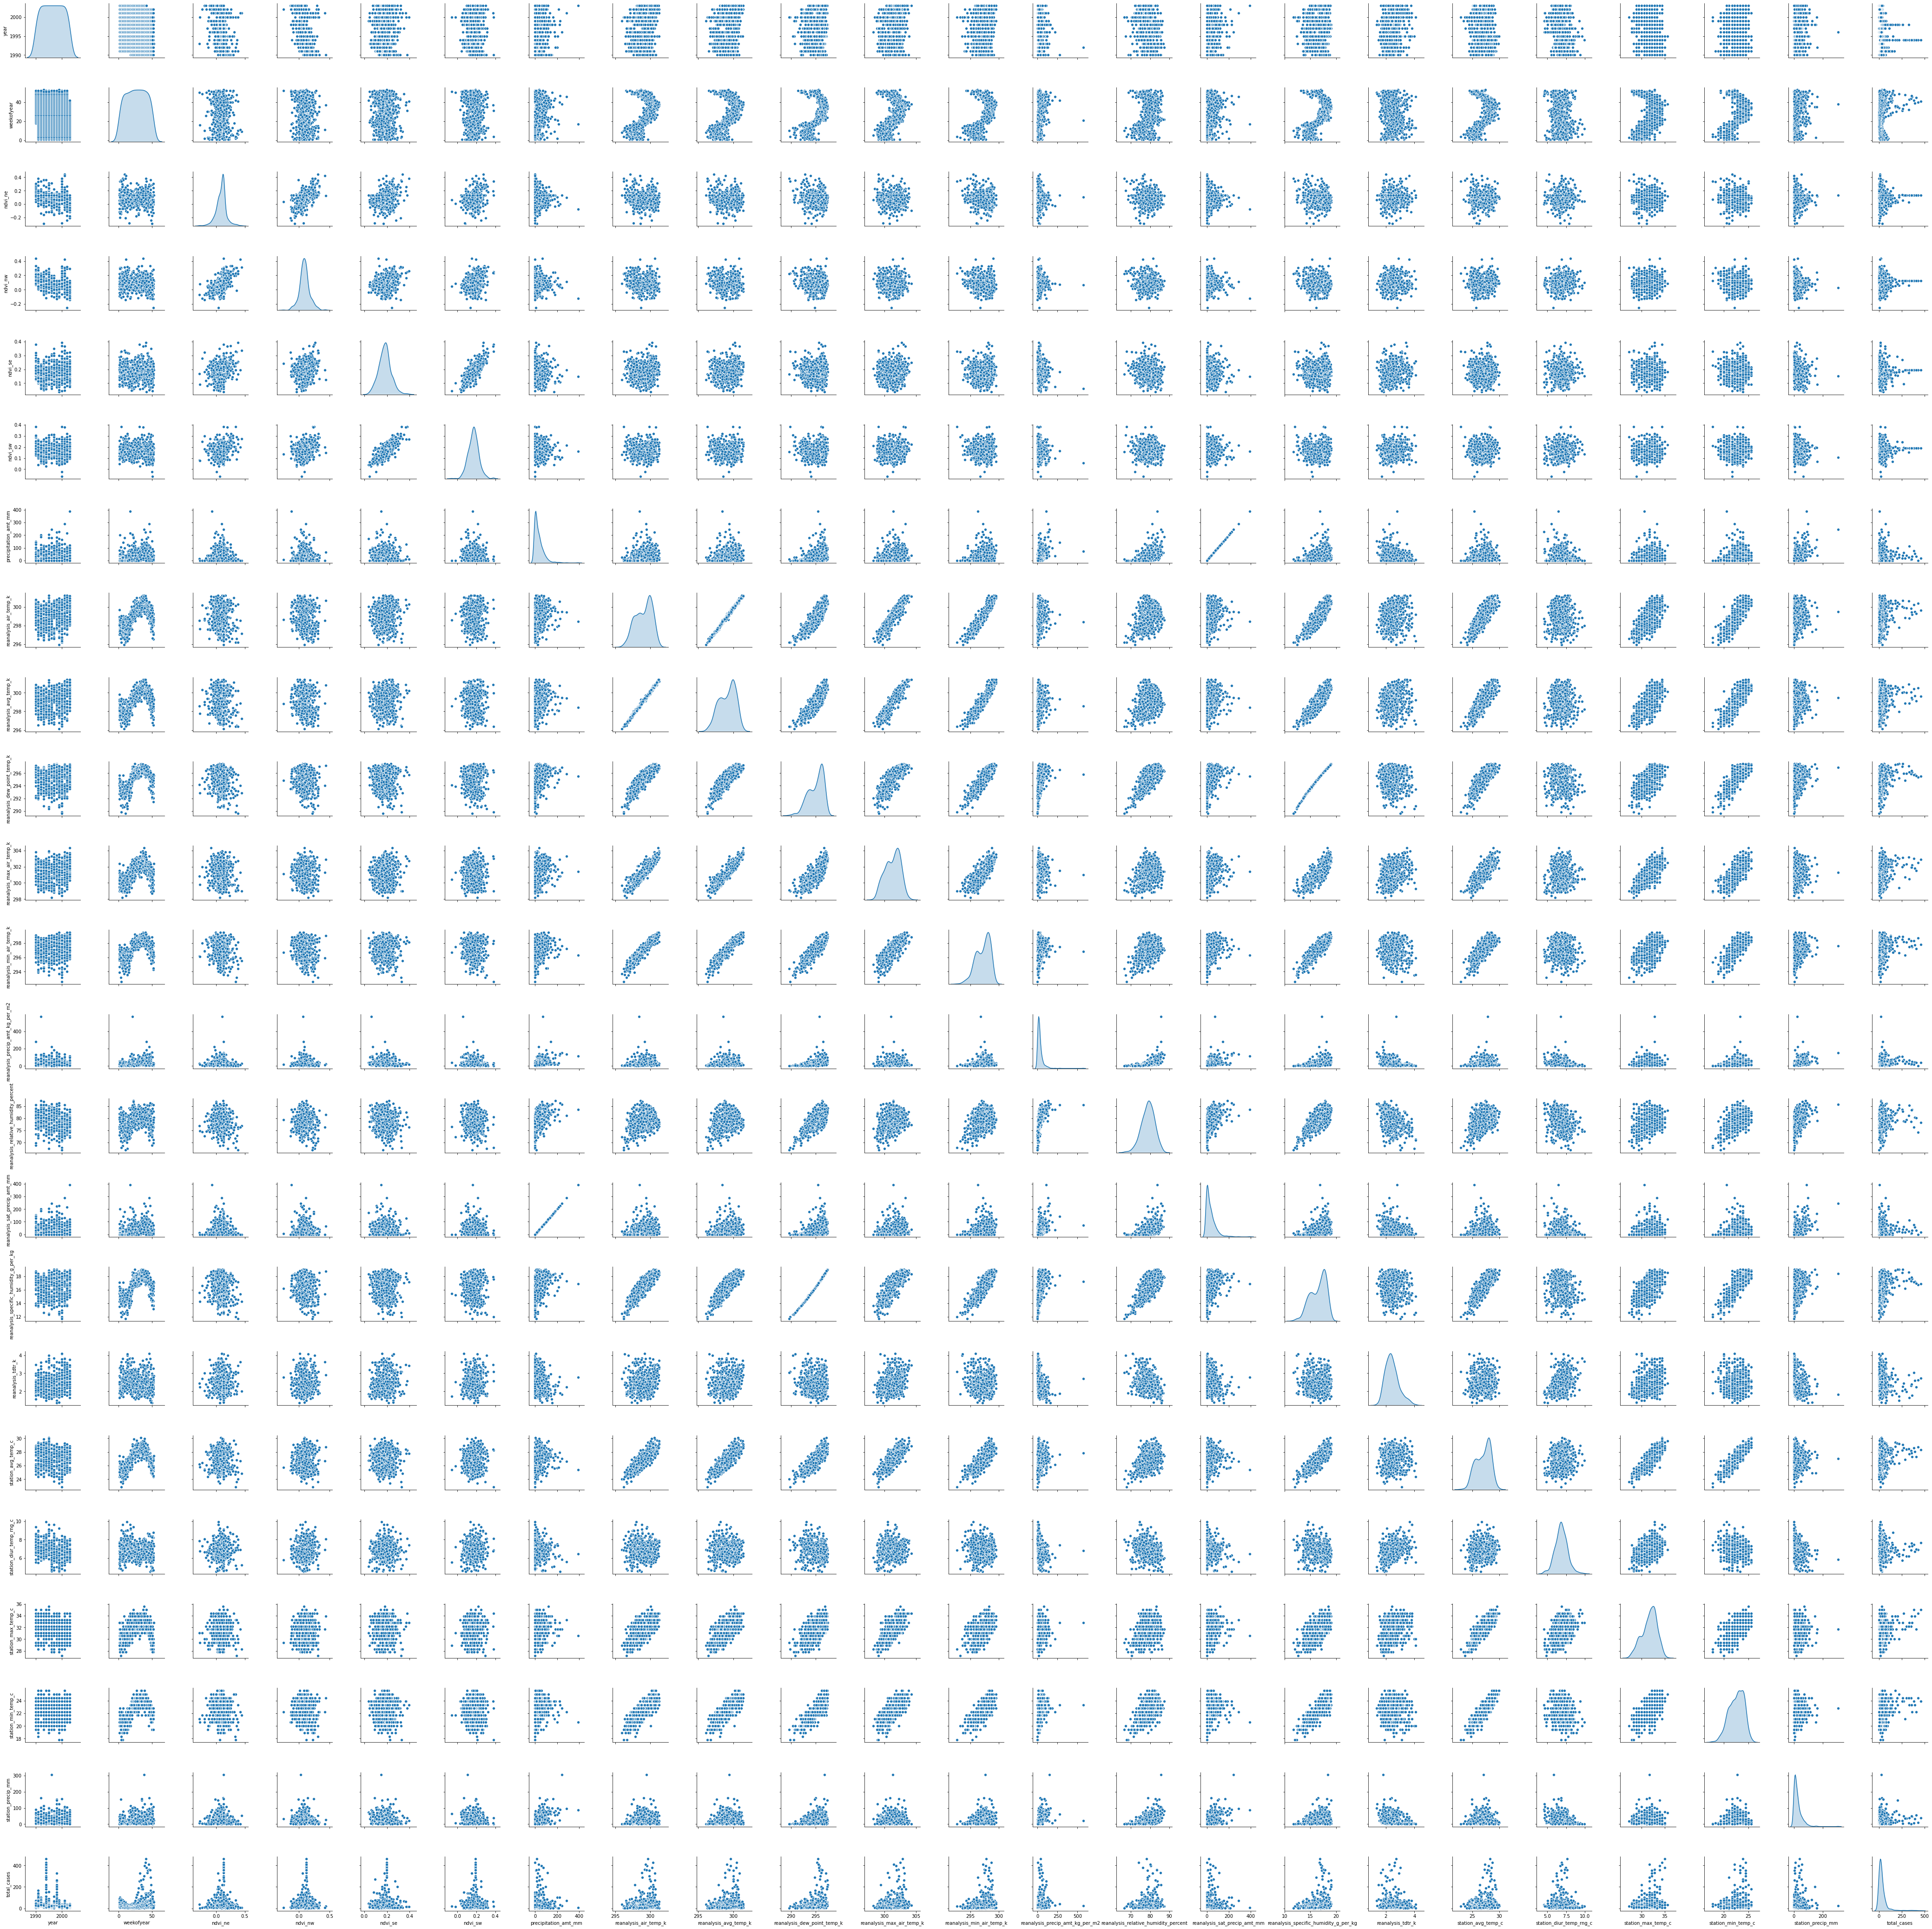

In [34]:
import seaborn as sns
x_new = x_int.loc[:700,:]

sns.pairplot(x_new , diag_kind = 'kde')

In [16]:
c= x_int.corr()
c


year  weekofyear   ndvi_ne  \
year                                   1.000000   -0.071649  0.211739   
weekofyear                            -0.071649    1.000000  0.048719   
ndvi_ne                                0.211739    0.048719  1.000000   
ndvi_nw                                0.142480    0.046131  0.812690   
ndvi_se                                0.232936    0.117921  0.589474   
ndvi_sw                                0.276553    0.065049  0.648909   
precipitation_amt_mm                   0.204228    0.117007  0.194231   
reanalysis_air_temp_k                 -0.139480    0.421332 -0.322423   
reanalysis_avg_temp_k                  0.084746    0.458883 -0.034436   
reanalysis_dew_point_temp_k            0.131980    0.345312  0.053366   
reanalysis_max_air_temp_k              0.477891    0.235458  0.613603   
reanalysis_min_air_temp_k             -0.390468    0.177839 -0.602005   
reanalysis_precip_amt_kg_per_m2        0.131705    0.072109  0.192015   
reanalysis_relative_humidity_percent   0.334588   -0.015089  0.446817   
reanalysis_sat_precip_amt_mm           0.204228    0.117007  0.194231   
reanalysis_specific_humidity_g_per_kg  0.161143    0.347180  0.089766   
reanalysis_tdtr_k                      0.487310    0.076906  0.656352   
station_avg_temp_c                     0.049703    0.361300  0.173333   
station_diur_temp_rng_c                0.361444    0.022137  0.615557   
station_max_temp_c                     0.226866    0.229806  0.458138   
station_min_temp_c                    -0.213300    0.288922 -0.296772   
station_precip_mm                      0.214780    0.064911  0.231207   
total_cases                           -0.306806    0.216452 -0.164899   

                                        ndvi_nw   ndvi_se   ndvi_sw  \
year                                   0.142480  0.232936  0.276553   
weekofyear                             0.046131  0.117921  0.065049   
ndvi_ne                                0.812690  0.589474  0.648909   
ndvi_nw                                1.000000  0.552205  0.648110   
ndvi_se                                0.552205  1.000000  0.820953   
ndvi_sw                                0.648110  0.820953  1.000000   
precipitation_amt_mm                   0.189442  0.075023  0.124611   
reanalysis_air_temp_k                 -0.313381 -0.157137 -0.227234   
reanalysis_avg_temp_k                 -0.030633  0.051170  0.022369   
reanalysis_dew_point_temp_k            0.061874  0.002410  0.019857   
reanalysis_max_air_temp_k              0.602085  0.467326  0.545982   
reanalysis_min_air_temp_k             -0.583430 -0.407274 -0.493675   
reanalysis_precip_amt_kg_per_m2        0.189540  0.035231  0.102368   
reanalysis_relative_humidity_percent   0.445485  0.215265  0.311380   
reanalysis_sat_precip_amt_mm           0.189442  0.075023  0.124611   
reanalysis_specific_humidity_g_per_kg  0.098771  0.028437  0.052644   
reanalysis_tdtr_k                      0.640764  0.485122  0.569211   
station_avg_temp_c                     0.200663  0.089925  0.121103   
station_diur_temp_rng_c                0.624929  0.433809  0.526088   
station_max_temp_c                     0.482636  0.289162  0.374219   
station_min_temp_c                    -0.298087 -0.250246 -0.292644   
station_precip_mm                      0.214830  0.127672  0.155619   
total_cases                           -0.142665 -0.124698 -0.147349   

                                       precipitation_amt_mm  \
year                                               0.204228   
weekofyear                                         0.117007   
ndvi_ne                                            0.194231   
ndvi_nw                                            0.189442   
ndvi_se                                            0.075023   
ndvi_sw                                            0.124611   
precipitation_amt_mm                               1.000000   
reanalysis_air_temp_k                             -0.016916   
reanalysis_avg_tem

# creating first model using XGBoost

In [17]:
Y= x_int['total_cases']
Y.head()

0    4
1    5
2    4
3    3
4    6
Name: total_cases, dtype: int64

In [18]:
Y=Y.astype('float')
Y.head()

0    4.0
1    5.0
2    4.0
3    3.0
4    6.0
Name: total_cases, dtype: float64

In [19]:
X=x_int

In [20]:
X=X.drop(['total_cases'], axis=1)
X.head()

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  1990          18  0.122600  0.103725  0.198483  0.177617   
1  1990          19  0.169900  0.142175  0.162357  0.155486   
2  1990          20  0.032250  0.172967  0.157200  0.170843   
3  1990          21  0.128633  0.245067  0.227557  0.235886   
4  1990          22  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 12.42             297.572857             297.742857   
1                 22.82             298.211429             298.442857   
2                 34.54             298.781429             298.878571   
3                 15.36             298.987143             299.228571   
4                  7.52             299.518571             299.664286   

   reanalysis_dew_point_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
0                   292.414286  ...                            32.00   
1                   293.951429  ...                            17.94   
2                   295.434286  ...                            26.10   
3                   295.310000  ...                            13.90   
4                   295.821429  ...                            12.20   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  
0                20.0               16.0  
1                22.2                8.6  
2                22.8               41.4  
3                23.3                4.0  
4                23.9                5.8  

[5 rows x 22 columns]

In [21]:
from xgboost import XGBRegressor
m_x=  XGBRegressor()

In [22]:
param_distributions = {"n_estimators": range(100,500,1)}

In [43]:
from sklearn.model_selection import RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(m_x, param_distributions, n_iter=400, verbose=1, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

In [44]:
rnd_search_cv.fit(X,Y)

C:\Users\ABHINAV\Anaconda3\envs\deeplearn\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 200 is smaller than n_iter=400. Running 200 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [45]:
rnd_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=299, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
rnd_search_cv.best_score_

-25.153561648813326

In [60]:
x_test= pd.read_csv('dengue_features_test.csv')
x_test.head()

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      29-04-2008  -0.0189 -0.018900  0.102729   
1   sj  2008          19      06-05-2008  -0.0180 -0.012400  0.082043   
2   sj  2008          20      13-05-2008  -0.0015       NaN  0.151083   
3   sj  2008          21      20-05-2008      NaN -0.019867  0.124329   
4   sj  2008          22      27-05-2008   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.091200                 78.60             298.492857  ...   
1  0.072314                 12.56             298.475714  ...   
2  0.091529                  3.66             299.455714  ...   
3  0.125686                  0.00             299.690000  ...   
4  0.075914                  0.76             299.780000  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1  

[5 rows x 24 columns]

In [61]:
x_t= x_test.drop(['city','week_start_date'], axis=1)
x_t.shape

(416, 22)

In [62]:
x_test.head()

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      29-04-2008  -0.0189 -0.018900  0.102729   
1   sj  2008          19      06-05-2008  -0.0180 -0.012400  0.082043   
2   sj  2008          20      13-05-2008  -0.0015       NaN  0.151083   
3   sj  2008          21      20-05-2008      NaN -0.019867  0.124329   
4   sj  2008          22      27-05-2008   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.091200                 78.60             298.492857  ...   
1  0.072314                 12.56             298.475714  ...   
2  0.091529                  3.66             299.455714  ...   
3  0.125686                  0.00             299.690000  ...   
4  0.075914                  0.76             299.780000  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1  

[5 rows x 24 columns]

In [52]:
x_t.isnull().sum()

year                                      0
weekofyear                                0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c                        9
station_precip_mm                         5
dtype: int64

In [53]:
x_t= x_t.fillna( x_t.median())
x_t.isnull().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

In [54]:
y_pred= rnd_search_cv.predict(x_t)
print(y_pred)

[ 3.13373160e+00  9.48626614e+00  3.71128464e+00  8.55488300e+00
  1.70102081e+01  1.16629210e+01  1.39662313e+01  1.55446072e+01
  1.97195702e+01  1.10433216e+01  1.25066862e+01  1.19217091e+01
  1.16654634e+01  3.50392761e+01  2.99669781e+01  6.64907379e+01
  2.42996311e+01  9.10031204e+01  8.28634491e+01  4.56122398e+01
  6.67393188e+01  4.67723961e+01  5.01462173e+01  4.94287338e+01
  3.88473282e+01  2.58413086e+01  2.59719257e+01  2.86154537e+01
  2.99389915e+01  2.26703243e+01  1.55779114e+01  1.04972887e+01
  1.22158241e+01  1.48703480e+01  4.55954504e+00  7.00501823e+00
  4.42399693e+00  1.00994253e+01  8.75200272e+00  7.80764246e+00
  3.66169477e+00  7.38512850e+00  8.30946255e+00  4.21893787e+00
 -9.72412705e-01 -2.80245662e+00 -3.61874676e+00 -5.52187538e+00
 -6.58958673e+00 -4.58372307e+00 -2.82233024e+00 -1.20654845e+00
 -3.15844393e+00 -3.66487265e+00 -1.25180185e+00 -2.99786878e+00
  3.14511466e+00  4.28685617e+00  2.77407980e+00  7.84664917e+00
  1.29381866e+01  2.19759

In [57]:
y=[int(round(abs(k))) for k in y_pred]
print(y)

[3, 9, 4, 9, 17, 12, 14, 16, 20, 11, 13, 12, 12, 35, 30, 66, 24, 91, 83, 46, 67, 47, 50, 49, 39, 26, 26, 29, 30, 23, 16, 10, 12, 15, 5, 7, 4, 10, 9, 8, 4, 7, 8, 4, 1, 3, 4, 6, 7, 5, 3, 1, 3, 4, 1, 3, 3, 4, 3, 8, 13, 22, 28, 38, 41, 40, 46, 72, 32, 70, 88, 36, 73, 51, 76, 69, 73, 63, 47, 9, 34, 31, 35, 16, 9, 8, 17, 7, 4, 16, 10, 5, 6, 8, 11, 7, 4, 3, 1, 7, 2, 3, 3, 3, 3, 14, 4, 1, 9, 33, 34, 19, 32, 35, 30, 39, 28, 15, 70, 64, 71, 68, 79, 56, 88, 79, 75, 67, 53, 70, 52, 34, 29, 13, 20, 15, 4, 1, 1, 3, 10, 7, 9, 8, 8, 6, 5, 4, 5, 1, 0, 2, 4, 2, 3, 3, 3, 3, 1, 4, 3, 12, 16, 20, 15, 35, 15, 16, 3, 22, 14, 40, 86, 58, 45, 55, 71, 33, 37, 88, 45, 25, 17, 45, 26, 20, 21, 19, 11, 23, 1, 8, 6, 12, 9, 8, 4, 6, 3, 1, 3, 1, 1, 2, 1, 2, 6, 3, 4, 2, 1, 4, 3, 8, 15, 15, 32, 28, 18, 15, 15, 21, 41, 19, 77, 68, 21, 44, 82, 60, 85, 77, 48, 40, 61, 81, 44, 33, 28, 17, 12, 12, 7, 9, 6, 10, 6, 8, 6, 5, 3, 1, 2, 4, 6, 0, 4, 2, 2, 0, 6, 2, 2, 4, 1, 5, 4, 5, 3, 8, 2, 1, 8, 5, 20, 7, 22, 7, 3, 14, 11, 1, 1, 6

In [63]:
df = pd.DataFrame(data=y, columns=['total_cases'])
i=pd.DataFrame(data=x_test, columns=['city','year','weekofyear'])
df_n= pd.concat([i, df], axis=1)

In [64]:
df_n.head()

city  year  weekofyear  total_cases
0   sj  2008          18            3
1   sj  2008          19            9
2   sj  2008          20            4
3   sj  2008          21            9
4   sj  2008          22           17

In [65]:
df_n.to_csv('output_xgb.csv', index= False)